# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [16]:
url = "http://api.openweathermap.org/data/2.5/weather?q="
api_key = "&appid=" + weather_api_key
data = requests.get(url + cities[10] + "&units=imperial" + api_key).json()
data

{'coord': {'lon': -50.21, 'lat': -30.18},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 56.57,
  'feels_like': 47.1,
  'temp_min': 56.57,
  'temp_max': 56.57,
  'pressure': 1018,
  'humidity': 77,
  'sea_level': 1018,
  'grnd_level': 1017},
 'visibility': 10000,
 'wind': {'speed': 16.69, 'deg': 203},
 'clouds': {'all': 69},
 'dt': 1597871048,
 'sys': {'country': 'BR', 'sunrise': 1597830623, 'sunset': 1597870720},
 'timezone': -10800,
 'id': 3466165,
 'name': 'Cidreira',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
city_weather = []

for i, city in enumerate(cities):
    print(f"Processing Record {i+1} of {len(cities)} : {city}")
    try: 
        city_data = requests.get(url + city + "&units=imperial" + api_key).json()
        city_lat = city_data['coord']['lat']
        city_lng = city_data['coord']['lon']
        city_max_temp = city_data['main']['temp_max']
        city_humidity = city_data['main']['humidity']
        city_cloudiness = city_data['clouds']['all']
        city_windspeed = city_data['wind']['speed']
        city_country = city_data['sys']['country']
        city_date = city_data['dt']
    
        city_weather.append({
            "City" : city,
            "Lat" : city_lat,
            "Lon" : city_lng,
            "Max Temp" : city_max_temp,
            "Humidity" : city_humidity,
            "Cloudiness" : city_cloudiness,
            "Windspeed" : city_windspeed,
            "Country" : city_country,
            "Date" : city_date,
        })
    except:
        print("City not found, skipping")
        pass

Processing Record 1 of 621 : vaitupu
City not found, skipping
Processing Record 2 of 621 : akdepe
Processing Record 3 of 621 : tasiilaq
Processing Record 4 of 621 : puerto ayora
Processing Record 5 of 621 : alberton
Processing Record 6 of 621 : mount gambier
Processing Record 7 of 621 : hobart
Processing Record 8 of 621 : upernavik
Processing Record 9 of 621 : ushuaia
Processing Record 10 of 621 : nancha
Processing Record 11 of 621 : cidreira
Processing Record 12 of 621 : basco
Processing Record 13 of 621 : vardo
Processing Record 14 of 621 : rikitea
Processing Record 15 of 621 : hermanus
Processing Record 16 of 621 : ancud
Processing Record 17 of 621 : bredasdorp
Processing Record 18 of 621 : bella union
Processing Record 19 of 621 : saint-philippe
Processing Record 20 of 621 : arraial do cabo
Processing Record 21 of 621 : morondava
Processing Record 22 of 621 : bambanglipuro
Processing Record 23 of 621 : tucurui
Processing Record 24 of 621 : yakeshi
Processing Record 25 of 621 : klak

Processing Record 196 of 621 : tongliao
Processing Record 197 of 621 : touros
Processing Record 198 of 621 : ituiutaba
Processing Record 199 of 621 : kulhudhuffushi
Processing Record 200 of 621 : kefamenanu
Processing Record 201 of 621 : dhaulpur
Processing Record 202 of 621 : estevan
Processing Record 203 of 621 : faanui
Processing Record 204 of 621 : virginia beach
Processing Record 205 of 621 : bedford
Processing Record 206 of 621 : den helder
Processing Record 207 of 621 : severo-kurilsk
Processing Record 208 of 621 : lingao
Processing Record 209 of 621 : nara
Processing Record 210 of 621 : esperance
Processing Record 211 of 621 : fort nelson
Processing Record 212 of 621 : balykshi
City not found, skipping
Processing Record 213 of 621 : necochea
Processing Record 214 of 621 : mikhaylovka
Processing Record 215 of 621 : saint anthony
Processing Record 216 of 621 : batemans bay
Processing Record 217 of 621 : verkhnevilyuysk
Processing Record 218 of 621 : kalmunai
Processing Record 219

Processing Record 389 of 621 : hachinohe
Processing Record 390 of 621 : alta floresta
Processing Record 391 of 621 : chicama
Processing Record 392 of 621 : rodrigues alves
Processing Record 393 of 621 : tilichiki
Processing Record 394 of 621 : nepalganj
City not found, skipping
Processing Record 395 of 621 : tarata
Processing Record 396 of 621 : falealupo
City not found, skipping
Processing Record 397 of 621 : vulcanesti
Processing Record 398 of 621 : taoudenni
Processing Record 399 of 621 : teya
Processing Record 400 of 621 : maturin
Processing Record 401 of 621 : pachino
Processing Record 402 of 621 : marsaxlokk
Processing Record 403 of 621 : kadoshkino
Processing Record 404 of 621 : ascension
Processing Record 405 of 621 : oudtshoorn
Processing Record 406 of 621 : kazerun
Processing Record 407 of 621 : vanimo
Processing Record 408 of 621 : berdigestyakh
Processing Record 409 of 621 : dong hoi
Processing Record 410 of 621 : kamloops
Processing Record 411 of 621 : tankhoy
Processing R

Processing Record 581 of 621 : erenhot
Processing Record 582 of 621 : marawi
Processing Record 583 of 621 : tumpat
Processing Record 584 of 621 : khandyga
Processing Record 585 of 621 : manzanillo
Processing Record 586 of 621 : quepos
Processing Record 587 of 621 : yenagoa
Processing Record 588 of 621 : menongue
Processing Record 589 of 621 : hvolsvollur
Processing Record 590 of 621 : cumaribo
City not found, skipping
Processing Record 591 of 621 : norsup
Processing Record 592 of 621 : la asuncion
Processing Record 593 of 621 : kamaishi
Processing Record 594 of 621 : marjamaa
Processing Record 595 of 621 : bhuj
Processing Record 596 of 621 : pyapon
Processing Record 597 of 621 : igdir
Processing Record 598 of 621 : santa luzia
Processing Record 599 of 621 : gisborne
Processing Record 600 of 621 : vitoria da conquista
Processing Record 601 of 621 : bara
Processing Record 602 of 621 : monroe
Processing Record 603 of 621 : boa vista
Processing Record 604 of 621 : moose factory
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
city_weather_df = pd.DataFrame(city_weather)
city_weather_df.count()

City          566
Lat           566
Lon           566
Max Temp      566
Humidity      566
Cloudiness    566
Windspeed     566
Country       566
Date          566
dtype: int64

In [19]:
city_weather_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,akdepe,42.06,59.38,69.80,46,0,8.32,TM,1597871113
1,tasiilaq,65.61,-37.64,50.00,66,0,10.29,GL,1597870916
2,puerto ayora,-0.74,-90.35,78.80,57,40,23.04,EC,1597871113
3,alberton,46.82,-64.07,72.43,60,16,10.80,CA,1597871113
4,mount gambier,-37.83,140.77,44.60,93,75,6.93,AU,1597871114


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
city_weather_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Windspeed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,19.219134,22.500954,67.715742,71.492933,51.978799,7.708392,1.597871e+09
std,33.765229,91.897150,14.901895,21.009373,38.486171,5.141782,9.991068e+01
min,-54.800000,-175.200000,34.180000,7.000000,0.000000,0.360000,1.597871e+09
25%,-8.130000,-61.985000,54.740000,60.000000,10.250000,3.777500,1.597871e+09
50%,20.795000,26.185000,69.800000,76.000000,52.500000,6.910000,1.597871e+09
75%,47.925000,106.182500,78.800000,87.000000,90.000000,10.560000,1.597871e+09
max,78.220000,179.320000,108.000000,100.000000,100.000000,31.090000,1.597871e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
# subset on cities with humidity > 100%
# bad_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
# data is fine already (max humidity is 100), skipping

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# data is fine already (max humidity is 100), skipping

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [21]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
city_weather_df.to_csv("output_data/cities.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

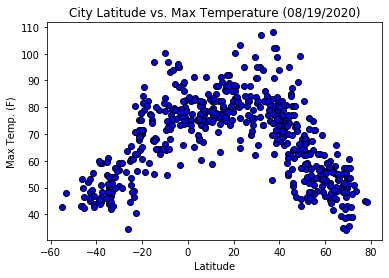

In [24]:
lat = city_weather_df["Lat"]
temp = city_weather_df["Max Temp"]
plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (08/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp. (F)")
plt.savefig("output_data/LatVsTemp.png")
# here we can get a sense for the relationship between latitude and temperature
# temperature tends to be highest at lower latitudes (and vice versa)

## Latitude vs. Humidity Plot

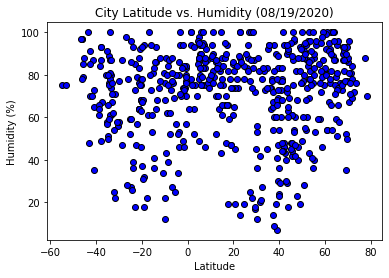

In [31]:
lat = city_weather_df["Lat"]
hum = city_weather_df["Humidity"]
plt.scatter(lat, hum, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity (08/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/LatVsHum.png")
# here we can get a sense for the relationship between latitude and humidity
# there is not much we can conclude here

## Latitude vs. Cloudiness Plot

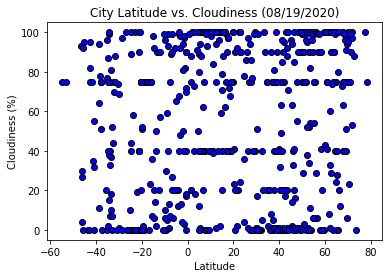

In [27]:
lat = city_weather_df["Lat"]
cld = city_weather_df["Cloudiness"]
plt.scatter(lat, cld, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (08/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/LatVsCld.png")
# here we can get a sense for the relationship between latitude and cloudiness
# again, not much we can conclude here

## Latitude vs. Wind Speed Plot

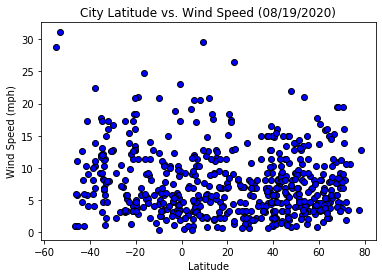

In [30]:
lat = city_weather_df["Lat"]
wind = city_weather_df["Windspeed"]
plt.scatter(lat, wind, marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (08/19/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/LatVsWind.png")
# here we can get a sense for the relationship between latitude and cloudiness
# no conclusions

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


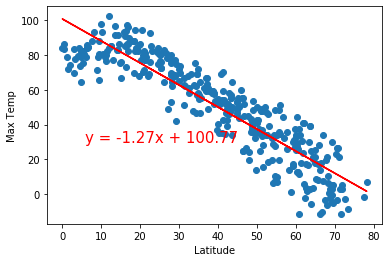

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


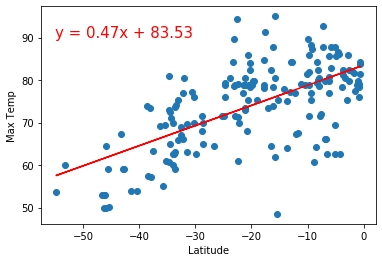

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


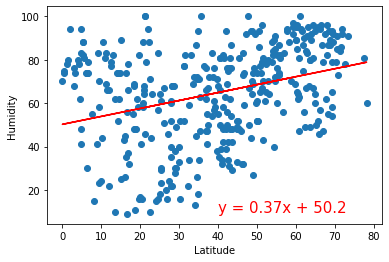

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


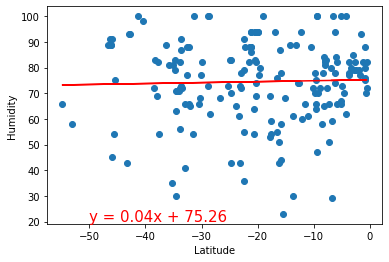

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


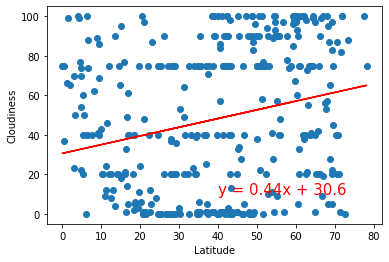

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


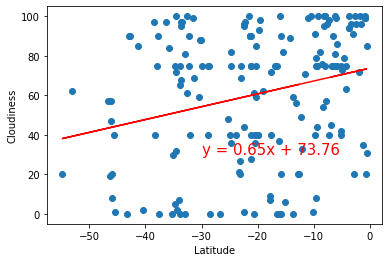

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


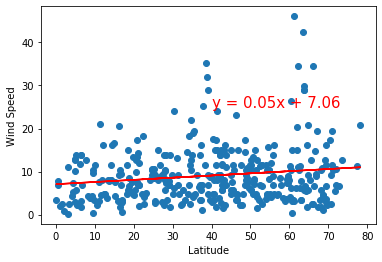

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


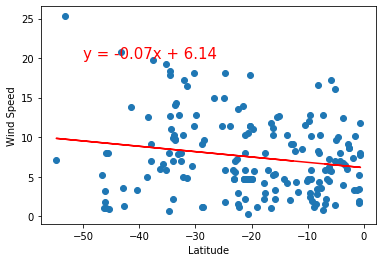